>>> Autores: 
>>>>* Margarita Peiró
>>>>* Miguel Rodríguez
>>>>* Fernando Campoy 

In [0]:
SANDBOX_NAME = 'fesc' # Sandbox Name
DATA_PATH = "/data/sandboxes/"+SANDBOX_NAME+"/data/"



# Workshop de Python

Cargamos datasets con información de admisiones a hospitales de enfermos de diabetes. El objetivo es, una vez limpiado el dataset, estudiarlo para extraer el máximo número de insights de los datos.



## Cargar librerías

In [0]:
%matplotlib inline

import re
import random
from collections import Counter

import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
sns.set(color_codes=True)



In [436]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive




## Lectura de datos

In [437]:
DATA_PATH = str('/content/drive/My Drive/Data Specialist Fundamentals/Data/dataset_diabetes/')
print(DATA_PATH)
diabetes = pd.read_csv(DATA_PATH+'diabetic_data.csv', sep=',')
admission_source = pd.read_csv(DATA_PATH+'admission_source_id.csv', sep=',')
admission_type = pd.read_csv(DATA_PATH+'admission_type_id.csv', sep=',')
discharge_disposition = pd.read_csv(DATA_PATH+'discharge_disposition_id.csv', sep=',')

/content/drive/My Drive/Data Specialist Fundamentals/Data/dataset_diabetes/




### Comprobar correcta lectura de los datos

> Para ello mostraremos de cada fichero:

> * cabecera y las primeras cinco filas (con el método head)
> *   Número de registros (con el método shape)
> *   Información de la estructura con dtypes.
> *   Cinco filas últimas (con el método tail)
> *   Cinco filas al azar (con el método sample)
> *   Información de los principales estadísticos (con el método describe)



>> Comprobamos las dimensiones de todos los ficheros:

In [438]:
# Tamaño de los datos
print('diabetes:.............. ',diabetes.shape)
print('admission_source:...... ',admission_source.shape)
print('admission_type:........ ',admission_type.shape)
print('discharge_disposition:. ',discharge_disposition.shape)


diabetes:..............  (101766, 50)
admission_source:......  (25, 2)
admission_type:........  (8, 2)
discharge_disposition:.  (30, 2)


>>**Fichero diabetes**

In [439]:
diabetes.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [440]:
print('Número de registros del fichero diabetes :', diabetes.shape[0])

Número de registros del fichero diabetes : 101766


In [441]:
print(diabetes.dtypes)

encounter_id                int64 
patient_nbr                 int64 
race                        object
gender                      object
age                         object
weight                      object
admission_type_id           int64 
discharge_disposition_id    int64 
admission_source_id         int64 
time_in_hospital            int64 
payer_code                  object
medical_specialty           object
num_lab_procedures          int64 
num_procedures              int64 
num_medications             int64 
number_outpatient           int64 
number_emergency            int64 
number_inpatient            int64 
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses            int64 
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [442]:
diabetes.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [443]:
diabetes.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
52927,155944764,40990284,Caucasian,Female,[60-70),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO
74038,219961932,93160467,Caucasian,Female,[40-50),?,1,1,7,3,...,No,No,No,No,No,No,No,No,Yes,NO
34397,107695572,23317407,AfricanAmerican,Female,[40-50),?,1,1,7,2,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
3959,23341350,1325322,AfricanAmerican,Male,[40-50),?,1,1,7,10,...,No,No,No,No,No,No,No,No,No,NO
45376,140244048,110918268,AfricanAmerican,Female,[50-60),?,2,1,7,1,...,No,No,No,No,No,No,No,No,No,>30


In [444]:
diabetes.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>> **Fichero admission_source**

In [445]:
admission_source.head()

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)


In [446]:
print('Número de registros del fichero admission_source :', admission_source.shape[0])

Número de registros del fichero admission_source : 25


>>> Dado el número de registros no merece la pena listar el resto de descripciones indicadas anteriormente (estadísticos principales, tipos, muestra o últimos 5 registros)


>>>**Fichero admission_source**

In [447]:
admission_type.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [448]:
print('Número de registros del fichero admission_type :', admission_type.shape[0])

Número de registros del fichero admission_type : 8


>>> Dado el número de registros no merece la pena listar el resto de descripciones indicadas anteriormente (estadísticos principales, tipos, muestra o últimos 5 registros)

>>>** Fichero discharge_disposition**

In [449]:
discharge_disposition.head()

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term hospital
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpatient care institution


In [450]:
print('Número de registros del fichero discharge_disposition :', discharge_disposition.shape[0])

Número de registros del fichero discharge_disposition : 30


>>> Dado el número de registros no merece la pena listar el resto de descripciones indicadas anteriormente (estadísticos principales, tipos, muestra o últimos 5 registros)



### Juntar todos los datos en el mismo DataFrame

>Utilizaremos el método merge para unir los datafranes manteniendo los registros del diabetes. Para ello informaremos el parámetro "left". 
>Realizaremos tres merges y cambiaremos el nombre de la columna con el método rename dado que en los tres ficheros "descriptivos" tiene el mismo nombre de columna.

In [451]:
# hacemos merge entre el fichero diabetes y el admission_source creando el dataframe temp1. Renombramos la columna 'description'
temp1 = pd.merge(diabetes, admission_source, on=['admission_source_id'], how='left')
temp1.rename(columns={'description':'admission_source_des'},inplace=True)   

# hacemos merge entre el fichero diabetes y el admission_source creando el dataframe temp1. Renombramos la columna 'description'
temp2 = pd.merge(temp1, admission_type, on=['admission_type_id'], how='left')
temp2.rename(columns={'description':'admission_type_des'},inplace=True)

# hacemos merge entre el fichero diabetes y el admission_source creando el dataframe temp1. Renombramos la columna 'description'
diab = pd.merge(temp2, discharge_disposition , on=['discharge_disposition_id'], how='left')
diab.rename(columns={'description':'discharge_disposition_des'},inplace=True)

# listamos las cabeceras y las primeras cinco filas del dataframe resultante
diab.head()



,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_source_des,admission_type_des,discharge_disposition_des
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home




### Estudiar las dimensiones del dataset

>mostramos las dimensiones del dataframe diabetes y el nuevo creado: diab. 
De esta forma comprobamos que el diab tiene 3 columnas mas y mantiene los registros

In [452]:
print('dimensión del fichero anterior: ', diabetes.shape)
print('dimensión del fichero fusionado:', diab.shape)


dimensión del fichero anterior:  (101766, 50)
dimensión del fichero fusionado: (101766, 53)


In [453]:
print('\nValores distintos por columna:\n')
print(diab.nunique())


Valores distintos por columna:

encounter_id                 101766
patient_nbr                  71518 
race                         6     
gender                       3     
age                          10    
weight                       10    
admission_type_id            8     
discharge_disposition_id     26    
admission_source_id          17    
time_in_hospital             14    
payer_code                   18    
medical_specialty            73    
num_lab_procedures           118   
num_procedures               7     
num_medications              75    
number_outpatient            39    
number_emergency             33    
number_inpatient             21    
diag_1                       717   
diag_2                       749   
diag_3                       790   
number_diagnoses             16    
max_glu_serum                4     
A1Cresult                    4     
metformin                    4     
repaglinide                  4     
nateglinide                  4 

>> A tenor de los valores únicos observamos que:
>>* Las variables encounter_id y patient_nbr son identificadores de la visita y del paciente, y por tanto consideramos que deben ponerse como índice del dataframe. El encounter_id es único pero el patient_nbr no lo es.



In [454]:
# ¿y en la patient_nbr cuantos hay con el mismo código?
print('Hay', diab['patient_nbr'].duplicated().sum(), 'entradas de clientes ya existentes (patient_nbr)')
print('Hay', diab['patient_nbr'].nunique(), 'entradas de pacientes únicas (patient_nbr)')
print('---------')
print('+ ', diab.shape[0])

Hay 30248 entradas de clientes ya existentes (patient_nbr)
Hay 71518 entradas de pacientes únicas (patient_nbr)
---------
+  101766


In [455]:
diab.set_index(['encounter_id','patient_nbr'],inplace=True)
diab.head()

,,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_source_des,admission_type_des,discharge_disposition_des
encounter_id,patient_nbr,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home


>> Observamos que las variables diag_1, diag_2 y diag_3 son variables de tipo "object" con demasiados valores únicos. 

>> Consideramos necesaria revisión con Data Owner para determinar el siginificado de las variables y acciones sobre ellas:

>>* Pasar a numéricas y eliminar los registros erróneos
>>* Quitar las columnas

.





## Data Wrangling



### Cambiar los nombres de las columnas para que cumplan buenas prácticas

> Examinaremos visualmente el nombre de las columnas y utilizamos los métodos lower y replace principalmente para sustituirlos en caso de necesitar modificarse.

In [456]:
print('Columnas originales: \n', diab.columns)

Columnas originales: 
 Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_source_des', 'admission_type_des',
       'discharge_disposition_des'],
      dtyp

> Comprobamos que hay columnas con '-' y alguna mayúscula introducida ('diabetesMed'). No se observan que empiecen por número ni que tengan ningún otro signo de puntuación.
Para modificarlo recorreremos las columnas con un list compehension.

In [457]:
# list comprehension para recorrer las columnas
diab.columns = [x.lower().replace('-','_').lower() for x in diab.columns]

#listamos como quedan las columnas para que se puedan verificar los cambios
print('Columnas modificadas: \n', diab.columns)


Columnas modificadas: 
 Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'a1cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesmed', 'readmitted',
       'admission_source_des', 'admission_type_des',
       'discharge_disposition_des'],
      dty



### Estudiar el formato de las variables, ver cuáles se deberían modificar y modificarlas cuando se considere oportuno

> Analizaremos, en función del tipo, cuáles son variables cuantitativas y cualitativas.

> Para ello realizaremos un chequeo visual con dtypes y listaremos los diferentes tipos que tiene el dataframe. También separaremos el dataframe en dos:
>* diab_cat: dataframe de variables cualitativas o categóricas
>* diab_num: dataframe de variables cuantitativas o numéricas.

> Pintaremos las variables cuantitativas en histogramas para verificar si realmente lo son. 

> En el caso de no serlo se modificarán a cualitativas, teniendo que volver a crear los dos dataframes (diab_cat y diab_num). Para ello definiremos una función por su reutilización en varios puntos.

In [458]:
# visualización de los tipos de todas las columnas
diab.dtypes


race                         object
gender                       object
age                          object
weight                       object
admission_type_id            int64 
discharge_disposition_id     int64 
admission_source_id          int64 
time_in_hospital             int64 
payer_code                   object
medical_specialty            object
num_lab_procedures           int64 
num_procedures               int64 
num_medications              int64 
number_outpatient            int64 
number_emergency             int64 
number_inpatient             int64 
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses             int64 
max_glu_serum                object
a1cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide               

>> Listamos los diferentes tipos existentes. Para ello utilizamos un conjunto 'Set' para eliminar duplicados

In [459]:
print(set(diab.dtypes.tolist()))

{dtype('int64'), dtype('O')}


>> Para asegurarnos que no hemos perdido ninguna variable listamos el número total de columnas de cada dataframe y del original

In [460]:
def crear_cat_num (df):
  df_cat = df.select_dtypes(include='object') 
  df_num = df.select_dtypes(include = ['float64', 'int64'])
  print('Columnas en categóricas: {} , numéricas: {} y en el original: {} '.format(df_cat.shape[1], df_num.shape[1], df.shape[1]))
  return df_cat, df_num

diab_cat, diab_num = crear_cat_num(diab)

Columnas en categóricas: 40 , numéricas: 11 y en el original: 51 


>> Visualizamos las los histogramas de las columnas cuantitativas (diab_num) 

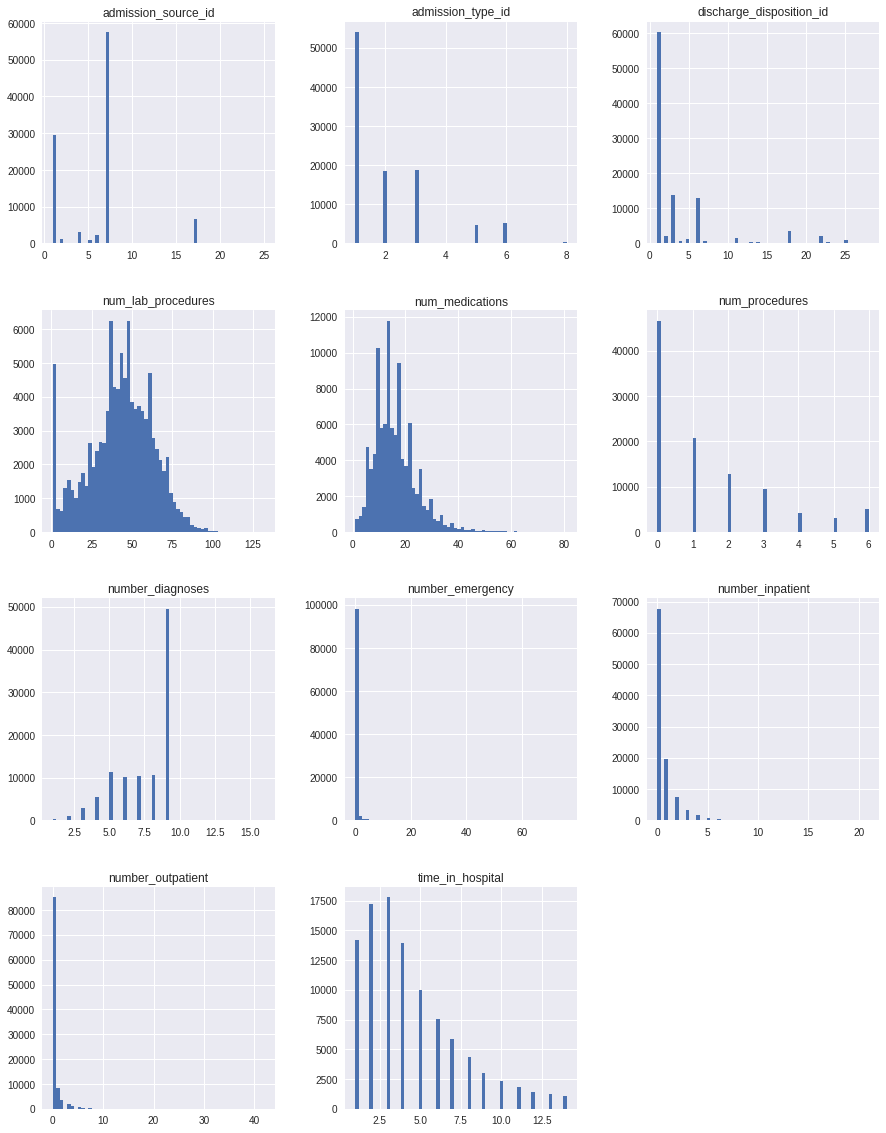

In [461]:
# visualizamos los histogramas
diab_num.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

>>Nos damos cuenta que son realmente cualitativas las siguientes columnas:

>>>* admission_source_id
>>>* admission_type_id
>>>* discharge_disposition_id


>> Comprobamos el cambio de tipo de las 3 variables:

In [462]:
# Cambiamos: 'admission_source_id', 'admissión_type_id' y 'discharge_disposition'
print('Tipos antes : \n')
print(diab[['admission_source_id','admission_type_id','discharge_disposition_id']].dtypes,'\n')

diab[['admission_source_id','admission_type_id','discharge_disposition_id']] = diab[['admission_source_id','admission_type_id','discharge_disposition_id']].applymap(str)
print('Tipos después : \n')
print(diab[['admission_source_id','admission_type_id','discharge_disposition_id']].dtypes)

Tipos antes : 

admission_source_id         int64
admission_type_id           int64
discharge_disposition_id    int64
dtype: object 

Tipos después : 

admission_source_id         object
admission_type_id           object
discharge_disposition_id    object
dtype: object


>> Por haber hecho esta modificación en las tipologías de las variables, volvemos a crear los dos dataframes que contienen las variables cualitativas (diab_cat) y las cuantitativas (diab_num), y comprobamos que realmente suman el total de columnas del fichero original. Para ello utilizamos la función creada anteriormente.

In [463]:
# volver a cambiar las variables categóricas y cualitativas
diab_cat, diab_num = crear_cat_num(diab)


Columnas en categóricas: 43 , numéricas: 8 y en el original: 51 




### Estudiar si hay registros repetidos

> Analizaremos si existen registros duplicados. 

In [464]:
if diab.duplicated().any() == False:
  print('No hay registros duplicados') 
else: 
  print('Hay registros duplicados')



No hay registros duplicados




### Estudiar si hay variables que siempre o prácticamente siempre toman el mismo valor: tomar siempre el mismo valor no aporta información al modelo

> Consideramos que las variables que siempre o casi siempre toman el mismo valor son las que concentran el 99,99 % de los registros en el mismo valor. 

> Para ello trabajaremos con bucles for para calcular el porcentaje que representa cada valor en cada variable y nos quedamos con aquellas en las que un valor represente al menos el 99,99 % de los registros.

In [465]:
#Identificamos las variables que no aportan por tener todos en el 99,99 % de los registros el mismo valor

var_ok = list()
var_eliminar = list()

for name in diab_cat:
  a = diab[name].value_counts() / diab[name].shape[0] * 100
  if a[ a >= 99.99  ].any(): 
      
      var_eliminar.append(name)
      print('\n* Variable --> ', name,'\n')
      for i, v in a.items():
         print('{:<20} : {:.>20.3f}%'.format(i, v)) 
      
      print('\n--------------------------------------------------------')
  else:
     var_ok.append(name)
      
      
print('Variables a mantener: ', var_ok, 
     '\nVariables a eliminar: ',  var_eliminar) 


* Variable -->  acetohexamide 

No                   : ..............99.999%
Steady               : ...............0.001%

--------------------------------------------------------

* Variable -->  troglitazone 

No                   : ..............99.997%
Steady               : ...............0.003%

--------------------------------------------------------

* Variable -->  examide 

No                   : .............100.000%

--------------------------------------------------------

* Variable -->  citoglipton 

No                   : .............100.000%

--------------------------------------------------------

* Variable -->  glimepiride_pioglitazone 

No                   : ..............99.999%
Steady               : ...............0.001%

--------------------------------------------------------

* Variable -->  metformin_rosiglitazone 

No                   : ..............99.998%
Steady               : ...............0.002%

-------------------------------------------------

> Existen 7 variables que prácticamente repiten el mismo valor y que por tanto deberían no considerarse en el modelo:
>>* acetohexamide
* trogliatazone
* examide
* citoglipton
* glimepiride_pioglitazone
* metformin_rosiglitazone
* metformin_pioglitazone



### Estudiar los nulos en el dataset

> Para ello se verificarán si existen nulos en el dataframe

In [466]:
# ¿hay alguno en la serie diab.isnull().any() que sea true?
if diab.isnull().any().any()  == False:
  print('No hay nulos en el fichero')
else:
  print('Existen nulos en el fichero')

No hay nulos en el fichero


>> No obstante se observa gran cantidad de datos que tienen valores que pudieran ser considerados como nulos. Por ejemplo el weight tiene el carácter "?", lo cual parece un nulo interpretado o traducido de alguna forma. 

>> Lo coherente es estudiar en todas las variables qué carácteres pudieran ser considerados como nulos e indicárselo al Data Owner para que lo verifique.

>> Para ello listamos las variables que tienen menos de 10 valores diferentes y el número de registros que tienen

In [467]:
for cols in diab_cat:

  val_distintos = diab[cols].value_counts()
  
  if val_distintos.size<10:
    print('* Variable --> ',cols,'\n')
    for i,v in val_distintos.items():
      print('     {:30} {:>10}'.format(i, v))
    print('\n--------------------------------------------------------')


* Variable -->  race 

     Caucasian                           76099
     AfricanAmerican                     19210
     ?                                    2273
     Hispanic                             2037
     Other                                1506
     Asian                                 641

--------------------------------------------------------
* Variable -->  gender 

     Female                              54708
     Male                                47055
     Unknown/Invalid                         3

--------------------------------------------------------
* Variable -->  admission_type_id 

     1                                   53990
     3                                   18869
     2                                   18480
     6                                    5291
     5                                    4785
     8                                     320
     7                                      21
     4                                      10



>>Las variables que parecen tener "nulos traducidos" son:
* race :                     ?                   2273 
* gender :                   Unknown/Invalid        3    
* weight :                   ?                  98569
* payer_code :               ?                  40256
* medical_specialty :        ?                  49949
* diag_3 :                   ?                   1423 
* max_glu_serum :            None               96420
* a1cresult :                None               84748
* admission_source_des :     None                6781 
* admission_type_des :       None                5291
* discharge_disposition_des: None                3691 

>> Los valores utilizados parecen ser "?", "Unknown/Invalid" y el "None", si bien el "None" se podría considerar una categorización  a tenor de la cantidad de registros que implican.

>> Vamos a realizar una búsqueda del valor "?" por si existiera alguna variable que no hubieramos detectado de manera visual con dicho valor.

>> Consultaremos al Data Owner si realmente son nulos y si lo fueran los actualizaríamos a nulos y eliminaríamos el registro con el método dropna()

>> Preguntaremos al Data Owner si merece la pena converir los "unknown/Invalid" de la variable 'gender' a la categoría más común

>> Se observa que las variables: diag_1, diag_2 y diag_3 son variables cualitativas que contiene algunos datos con caracteres que provoca su transformación en variables cuantitativas. Se ve necesario contrastar con el Data Owner el tratamiento (limpiar dichos valores y convertirlas en cuantitativas o dejarlas como están)

In [468]:
# Realizamos una búqueda de ? en todas las variables cualitativas
for cols in diab_cat:
  a = diab[cols].value_counts()
  for i in a.index:
    if i == '?':
      print(cols,':',i, '-> ', a[i]) 
      #print('Hay', a[i], ' ? en:', cols)
  

race : ? ->  2273
weight : ? ->  98569
payer_code : ? ->  40256
medical_specialty : ? ->  49949
diag_1 : ? ->  21
diag_2 : ? ->  358
diag_3 : ? ->  1423


>> Vemos que realmente hay 7 variables que tienen el "nulo traducido" a "?". Estas son:
* race: recomendamos cambiarlo al valor medio
* weight: 
* payer_code: 
* medical_specialty
* diag_1: 
* diag_2: 
* diag_3: 






### Estudiar los outliers

> Primeramente visualizamos los histogramas de cada variable cuantitativa

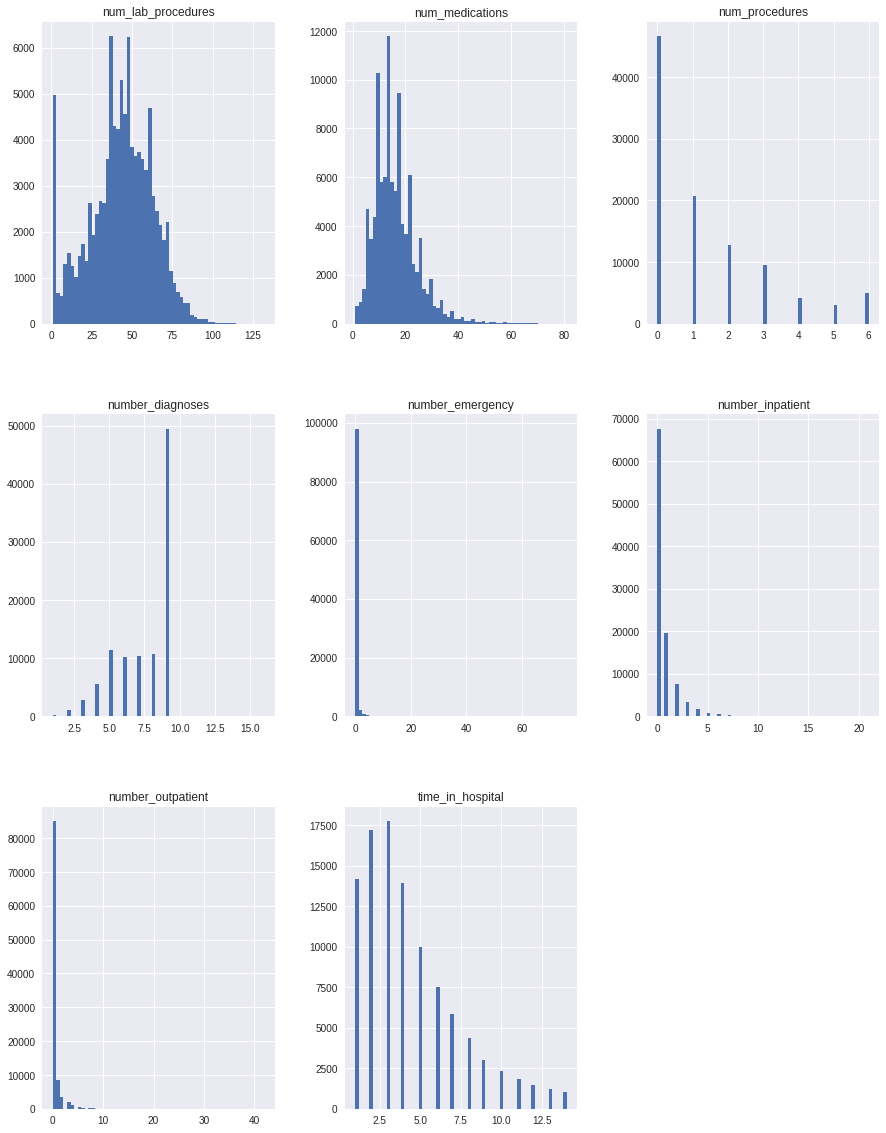

In [469]:
diab_num.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);



>> Para visualizar los outliers pintamos para cada variable cuantitativa un boxplot individua con su correspondiente histogramal. De esta forma verificamos la existencia de outliers en dicha variable

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


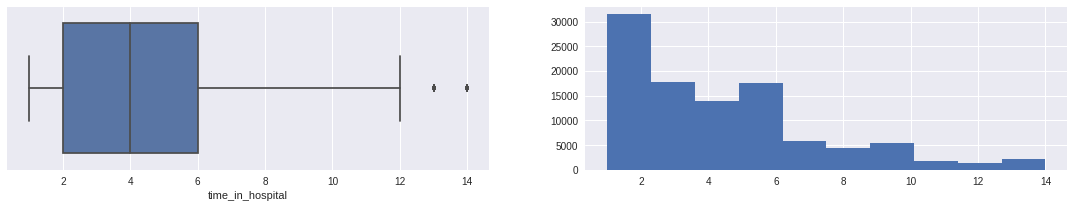

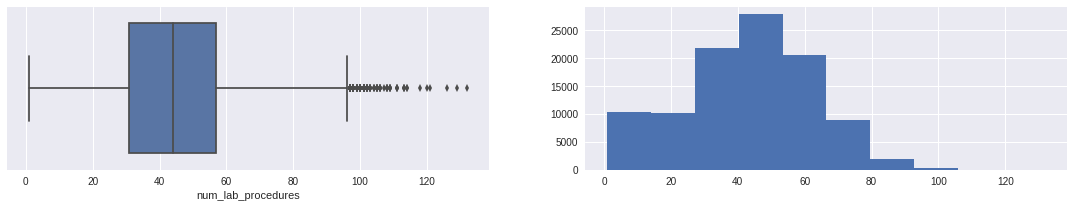

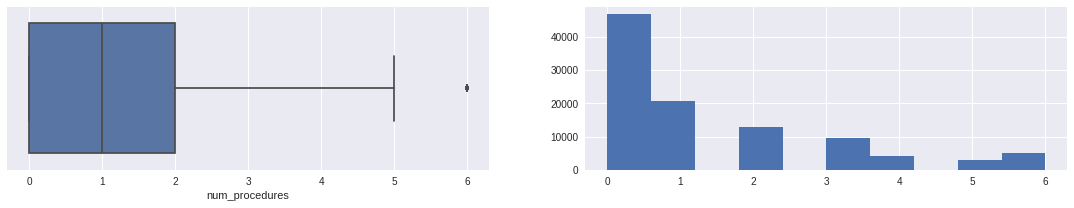

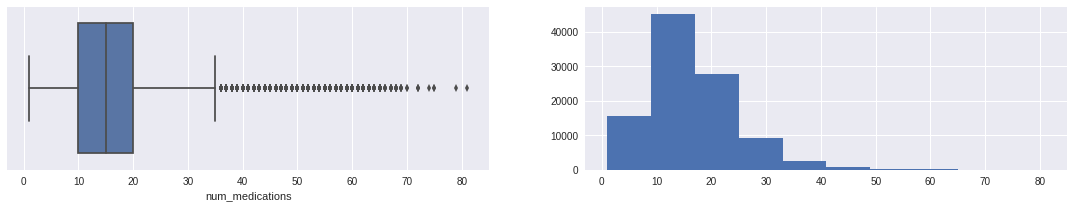

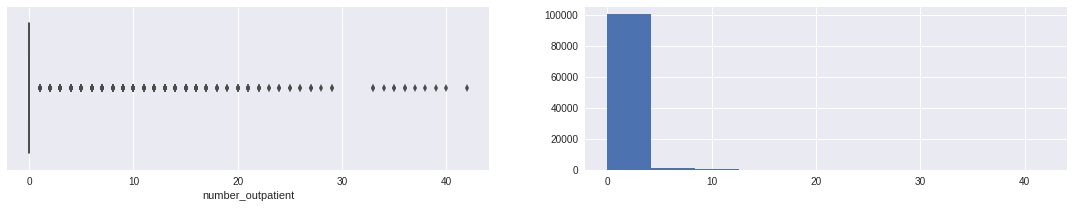

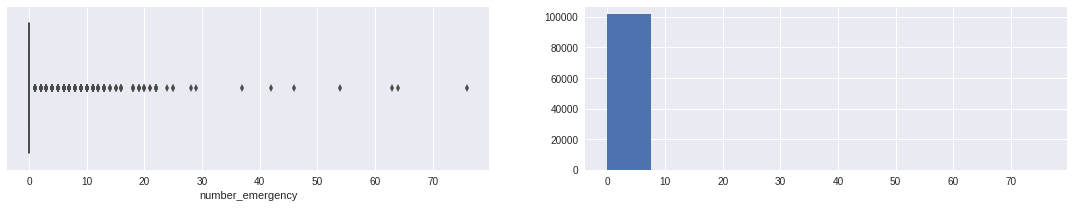

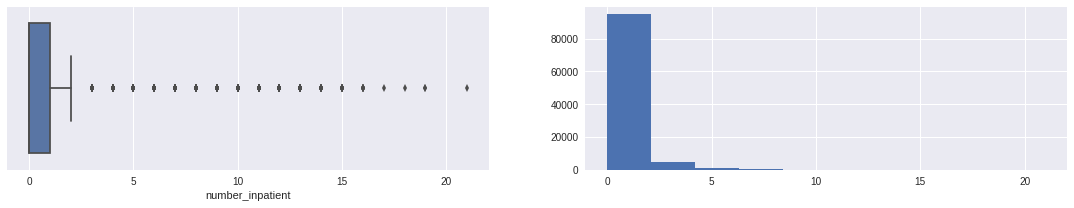

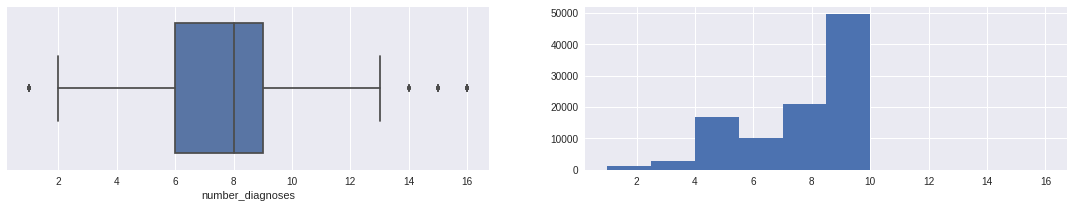

In [470]:
for cols in diab_num.columns:
    plt.figure(figsize = (19, 3))
    plt.subplot(1, 2, 1)
    ax = sns.boxplot(x=diab[cols])
   
    plt.subplot(1, 2, 2)
    plt.hist(diab_num[cols])
    


>> Los puntos representados antes y después del mínimo y máximo representado son los outliers o valores atípicos.

>> Listamos los outliers que hay por variable y por valor



In [471]:
var_with_outliers=list()

for column in diab_num.columns:

  q1,q3 = np.percentile(diab_num[column],[25,75])
  iqr = q3 - q1
  print ("-------------------------------------------------------------------------------")
  print("Variable '{}'' con q1: {} , q3: {} e iqr {}".format(column,q1,q3,iqr))
  c_outliers = 0
  mylist = []
  tiene_ol = False
  for i,v in diab_num[column].items():
      if (v > (q3 + 1.5 * iqr)) or (v < (q1 - 1.5 * iqr)):
          tiene_ol = True
          c_outliers += 1
          mylist.append(v)
  if tiene_ol:
    var_with_outliers.append(column)
    
  myserie = pd.Series(mylist)
  print("Número de outliers: {} con valores:".format(c_outliers))
  print(myserie.value_counts())
print('\nEn total hay: ',len(var_with_outliers),' variables con outliers\n', var_with_outliers)

-------------------------------------------------------------------------------
Variable 'time_in_hospital'' con q1: 2.0 , q3: 6.0 e iqr 4.0
Número de outliers: 2252 con valores:
13    1210
14    1042
dtype: int64
-------------------------------------------------------------------------------
Variable 'num_lab_procedures'' con q1: 31.0 , q3: 57.0 e iqr 26.0
Número de outliers: 143 con valores:
97     31
98     26
100    13
101    13
99     9 
102    8 
103    6 
105    6 
106    5 
109    4 
108    4 
113    3 
111    3 
104    3 
114    2 
132    1 
129    1 
118    1 
120    1 
121    1 
126    1 
107    1 
dtype: int64
-------------------------------------------------------------------------------
Variable 'num_procedures'' con q1: 0.0 , q3: 2.0 e iqr 2.0
Número de outliers: 4954 con valores:
6    4954
dtype: int64
-------------------------------------------------------------------------------
Variable 'num_medications'' con q1: 10.0 , q3: 20.0 e iqr 10.0
Número de outliers: 2557 co

>> Representamos los mismos boxplot de las variables cuantitativas segmentadas por las categorías de 'readmitted', para verificar dónde se producen más valores atípicos


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


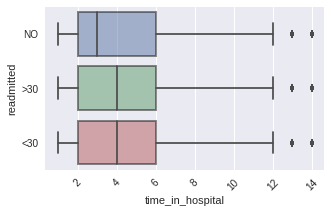

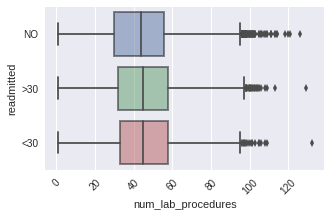

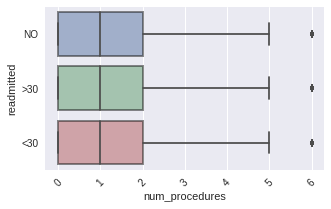

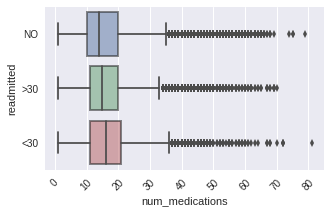

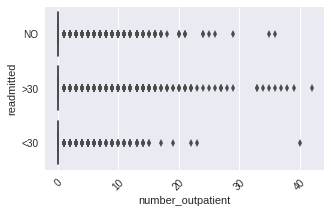

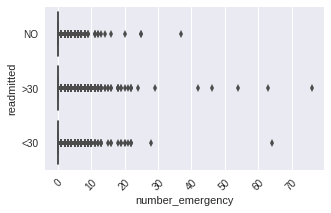

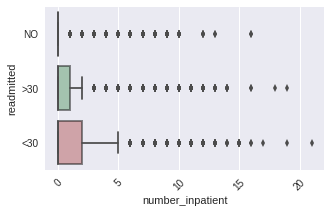

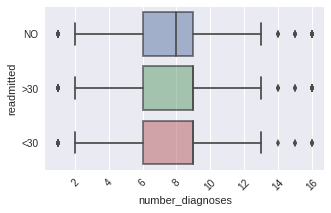

In [472]:
for cols in diab_num.columns:
  plt.figure(figsize = (5, 3))
  ax = sns.boxplot(x=cols, y='readmitted', data=diab)
  plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
  plt.xticks(rotation=45)



### Crear variables dummy en caso que sea conveniente

>> Realizamos la creación de variables dummies con la variable 'age' y las concatenamos a un nuevo dataframe a la espera de que el Data Owner nos confirme la necesidad de realizar este tratamiento.

In [473]:
# Create a set of dummy variables from the 'age' variable
diab_age = pd.get_dummies(diab['age'])

# Join the dummy variables to the main dataframe
diab_new = pd.concat([diab, diab_age], axis=1)
diab_new.head()

,,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
encounter_id,patient_nbr,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,1,0,0,0,0,0,0,0,0,0
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,0,1,0,0,0,0,0,0,0,0
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,0,0,1,0,0,0,0,0,0,0
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,0,0,0,1,0,0,0,0,0,0
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,0,0,0,0,1,0,0,0,0,0




### Estudiar que todas las variables ahora sí tengan el formato y contenido adecuado. si todavía no, arreglarlas.

>> Eliminamos las variables que siempre o casi siempre tienen un único valor visto en un punto anterior. Éstas son:

>>* acetohexamide
>>*  troglitazone
>>*  examide
>>*  citoglipton
>>*  glimepiride_pioglitazone
>>*  metformin_rosiglitazone
>>*  metformin_pioglitazone


In [474]:
print(diab.shape)
print('Num:',diab_num.shape)
print('Cat:',diab_cat.shape)
diab.drop(var_eliminar, axis=1,inplace=True)

# volvemos a generar los dataframes categórico y numérico
diab_cat, diab_num = crear_cat_num(diab)

print(diab.shape)
print('Num:',diab_num.shape)
print('Cat:',diab_cat.shape)

(101766, 51)
Num: (101766, 8)
Cat: (101766, 43)
Columnas en categóricas: 36 , numéricas: 8 y en el original: 44 
(101766, 44)
Num: (101766, 8)
Cat: (101766, 36)




### Antes de estudiar el comportamiento de las variables, veremos si hay alguna variable derivada a crear


>> Vamos a estudiar la relación entre las variables categóricas

>> Las variables cualitativas se verán en el estudio de correlación

>> La relación entre cuantitativas y cualitativas se ha analizado con el boxplot planteado cruzado con las categorías de "readmitted"


In [475]:
diab_cat.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'a1cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'change', 'diabetesmed', 'readmitted', 'admission_source_des',
       'admission_type_des', 'discharge_disposition_des'],
      dtype='object')

In [476]:
grouped = diab_cat.groupby(['admission_type_id','readmitted'])
grouped.size()

admission_type_id  readmitted
1                  <30           6221 
                   >30           19309
                   NO            28460
2                  <30           2066 
                   >30           6452 
                   NO            9962 
3                  <30           1961 
                   >30           5746 
                   NO            11162
4                  <30           1    
                   >30           2    
                   NO            7    
5                  <30           495  
                   >30           1721 
                   NO            2569 
6                  <30           586  
                   >30           2231 
                   NO            2474 
7                  NO            21   
8                  <30           27   
                   >30           84   
                   NO            209  
dtype: int64

In [477]:
my_table = pd.crosstab(index=diab_cat["readmitted"], 
                          columns=diab_cat["admission_type_des"])

my_table

admission_type_des,Elective,Emergency,Newborn,None,Not Available,Not Mapped,Trauma Center,Urgent
readmitted,,,,,,,,
<30,1961,6221,1,586,495,27,0,2066
>30,5746,19309,2,2231,1721,84,0,6452
NO,11162,28460,7,2474,2569,209,21,9962


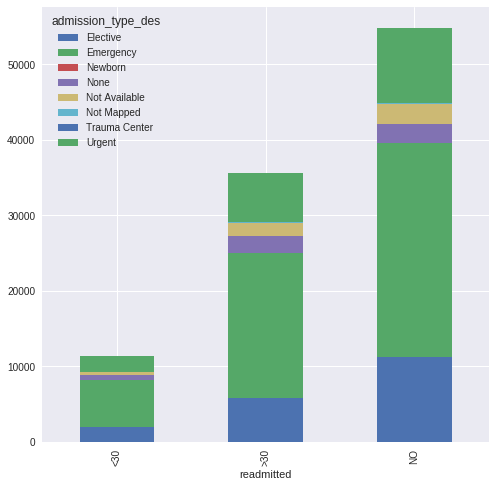

In [478]:
my_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)



# Exploratory Data Analysis



### Crear la matriz de correlación

>> Creamos la matriz de correlación a través del método ".corr()". Ésto sólo se hace para las variables cuantitativas ya que para el resto carece de sentido (aunque si la categorización de una variable fuera elevada sí podría ser representativa)

>> Nota: el método .corr() sólo trabaja con las cuantitativas, por lo que se podría partir del dataframe complento

In [479]:
diab.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539
number_inpatient,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,0.104710
number_diagnoses,0.220186,0.152773,0.073734,0.261526,0.094152,0.055539,0.104710,1.000000




### Pintar la matriz de correlación

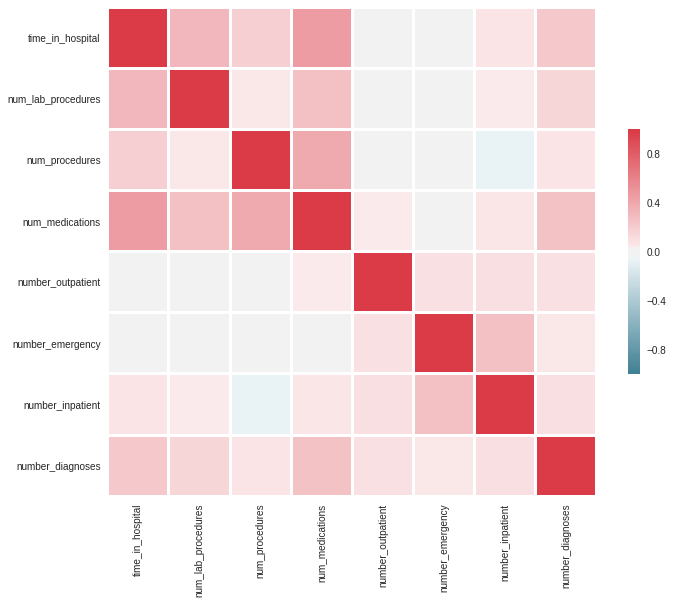

In [480]:
f, ax =plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(diab.corr(), cmap = cmap, vmax = 1, center = 0, square=True,
            linewidths=2, cbar_kws={"shrink":.5})



### Determinar qué par de variables están correlacionadas

>> Considerando para este estudio que dos variables están correlacionadas suponiendo que su coeficiente de correlación de Pearson está por encima de 0.3 vamos a listar aquellos pares de variables que cumplan este criterio.

In [482]:
#Estudio de correlación de una variable respecto al resto de variables numéricas
for cols in diab_num.columns: 
  
  #Seleccionamos la correlación de una variable con el resto
  
  df_numerical_corr = diab_num.corr()[cols]
  
  #filtramos las >0.3 y ordenamos
  
  df_numerical_most_corr = df_numerical_corr[abs(df_numerical_corr) > 0.3].sort_values(ascending=False) 
  
  diab_num_corr = diab_num.corr()[cols]
  
  diab_num_most_corr = diab_num_corr[(abs(diab_num_corr) > 0.3)]  
  
  if df_numerical_most_corr.size > 1:
      print('* Variable --> ', cols, '\n')
      
      for i, v in df_numerical_most_corr.items():
        
        if i!=cols:
           print('     {:20} {:>10}'.format(i, v))
      
      print('\n--------------------------------------------------------')



* Variable -->  time_in_hospital 

     num_medications      0.4661354174309466
     num_lab_procedures   0.31845016879986726

--------------------------------------------------------
* Variable -->  num_lab_procedures 

     time_in_hospital     0.31845016879986726

--------------------------------------------------------
* Variable -->  num_procedures 

     num_medications      0.3857672728486079

--------------------------------------------------------
* Variable -->  num_medications 

     time_in_hospital     0.4661354174309466
     num_procedures       0.3857672728486079

--------------------------------------------------------


>> Concluimos que se encuentran algo correlacionadas en sentido directo los siguientes pares de variables:
>>* time_in_hospital  con: 
>>>* num_lab_procedures    0.318450
>>>* num_medications       0.466135

>>* num_procedures     
>>>* num_medications    0.385767

